# Movie Collection Dataset
    ###  by Amine Litim
### The purpose of this analysis is to apply 3 major classifiers ;  K-nearest Neighbors, Logistic Regression and Linear Discriminant Analysis to Classify data and predict if the movie is winning an Oscar or not

 ### For an organizational purpose, all libraries and packages are imported in this first cell:

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns #for data visualisation ( just like matplotlib) 


import statsmodels.api as sn 
import statsmodels.discrete.discrete_model as sm 

# Sickit Learn Models: 
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split   # to split data into train - test
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV


# sns.distplot(dataset.variable)
# sns.jointplot(x= , y= , data= '') 
#sns.pairplot(dataset)
#to get help about any function, it is possible to use the symbol "?" before it; example: ?sns.boxplot

In [2]:
# pwd command is to localise my work path

In [3]:

pwd

'C:\\Users\\amine\\Data mining course\\Data mining homeworks'

In [4]:
df= pd.read_csv("movie_collection.csv", header= 0)
df

,Collection,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,MPAA_film_rating,Num_multiplex,Start_Tech_Oscar
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,PG,494,0
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,PG,462,1
2,69400,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,PG,458,0
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,PG,472,0
4,72400,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,PG,395,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,44800,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,492480,NO,186.96,243.584,Action,27,PG,561,1
502,41200,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,482875,YES,132.24,263.296,Action,20,PG,600,1
503,47800,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,532239,NO,109.56,243.824,Comedy,31,PG,576,1
504,44000,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,496077,YES,158.80,303.520,Comedy,47,PG,607,1


In [5]:
df.describe()

,Collection,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Start_Tech_Oscar
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,494.000000,506.000000,506.000000,506.000000,506.000000
mean,45057.707510,92.270471,77.273557,0.445305,34911.144022,142.074901,8.014002,8.185613,8.019664,8.190514,7.810870,449860.715415,157.391498,260.832095,39.181818,545.043478,0.454545
std,18364.351764,172.030902,13.720706,0.115878,3903.038232,28.148861,1.054266,1.054290,1.059899,1.049601,0.659699,68917.763145,31.295161,104.779133,12.513697,106.332889,0.498422
min,10000.000000,20.126400,55.920000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,212912.000000,0.000000,201.152000,3.000000,333.000000,0.000000
25%,34050.000000,21.640900,65.380000,0.376000,32693.952500,118.525000,7.316250,7.503750,7.296250,7.507500,7.200000,409128.000000,132.300000,223.796000,28.000000,465.000000,0.000000
50%,42400.000000,25.130200,74.380000,0.462000,34488.217500,151.000000,8.307500,8.495000,8.312500,8.465000,7.960000,462460.000000,160.000000,254.400000,39.000000,535.500000,0.000000
75%,50000.000000,93.541650,91.200000,0.551000,36793.542500,167.575000,8.865000,9.030000,8.883750,9.030000,8.260000,500247.500000,181.890000,283.416000,50.000000,614.750000,1.000000
max,100000.000000,1799.524000,110.480000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,2022.400000,60.000000,868.000000,1.000000


In [6]:
#The mean is not too different from the median ( 45057 comparing to 42400), and quartile ranges are close to each other
# ( always compare the distance between the 5 lower numbers from "min" to "max")
#it's a case of a normal distibution 

In [7]:
df.info()
# the Column '3D_available' shows object as type of data (String)
#the column 'Time_taken' is missing some values, we should deal with that. 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 20 columns):
Collection             506 non-null int64
Marketing expense      506 non-null float64
Production expense     506 non-null float64
Multiplex coverage     506 non-null float64
Budget                 506 non-null float64
Movie_length           506 non-null float64
Lead_ Actor_Rating     506 non-null float64
Lead_Actress_rating    506 non-null float64
Director_rating        506 non-null float64
Producer_rating        506 non-null float64
Critic_rating          506 non-null float64
Trailer_views          506 non-null int64
3D_available           506 non-null object
Time_taken             494 non-null float64
Twitter_hastags        506 non-null float64
Genre                  506 non-null object
Avg_age_actors         506 non-null int64
MPAA_film_rating       506 non-null object
Num_multiplex          506 non-null int64
Start_Tech_Oscar       506 non-null int64
dtypes: float64(12), int64(5

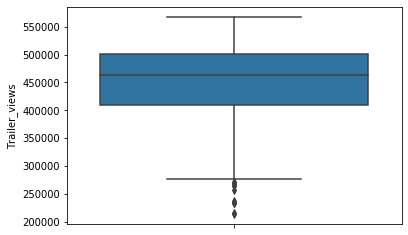

In [8]:
sns.boxplot( y= "Trailer_views", data=df)

In [9]:
#The interquartile range of the distribution is between 40k and 50k, 
#also, the boxplot shows the existence of outliers among the values of the variable "Trailer_views"

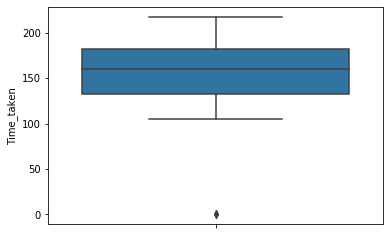

In [10]:
sns.boxplot(y="Time_taken",data=df)

In [11]:
#The interquartile range of the distribution is between 130 and 180, 
#also, the boxplot shows the existence of outliers among the values of the variable "Time_taken" of a value 0

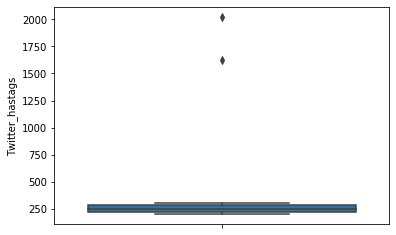

In [12]:
sns.boxplot(y="Twitter_hastags",data=df) 

In [13]:
#The interquartile range of the distribution is between 223 and 283 
#also, the boxplot shows the existence of outliers among the values of the variable "Twitter_hastags"

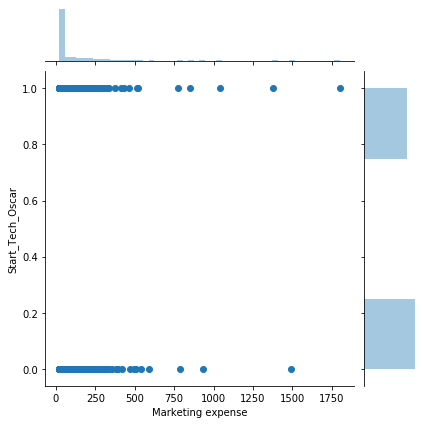

In [14]:
sns.jointplot(x="Marketing expense" , y="Start_Tech_Oscar" , data=df)
# both must be of type float, categorical variables of type string are not accepted

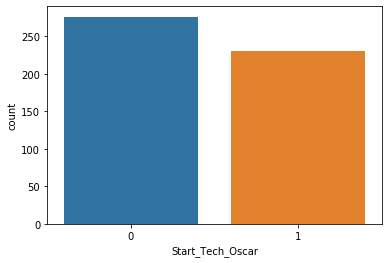

In [15]:
sns.countplot(x="Start_Tech_Oscar", data= df)

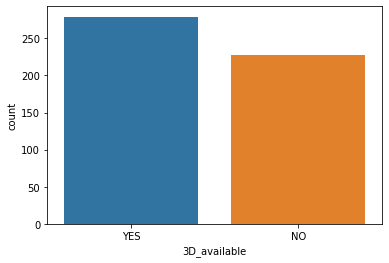

In [16]:
sns.countplot(x="3D_available", data= df)

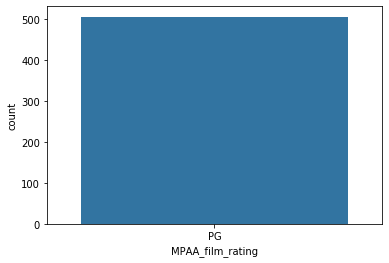

In [17]:
 sns.countplot(x="MPAA_film_rating", data= df)

### this variable here "MPAA FILM RATING" shows only one result: it's considered a constant; we can delete it
### we apply del df['MPAA_film_rating'] 

### now we should deal with outliers, and adjust their values: 

In [18]:
#detect the outlier and display is as a value not an array output ( the reason behind using [0])
lv = np.percentile(df.Trailer_views,[1])[0]
lv

257424.94999999998

In [19]:
#display all the values lower then 0.3*1% percentile value
df[(df.Trailer_views<lv)]

,Collection,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,MPAA_film_rating,Num_multiplex,Start_Tech_Oscar
141,28800,52.5728,98.78,0.376,27880.545,173.5,9.185,9.340,9.145,9.450,7.76,233100,YES,199.76,242.304,Comedy,43,PG,561,0
373,27600,242.1620,91.20,0.332,27252.830,173.5,9.260,9.505,9.360,9.525,7.96,237541,YES,137.52,262.208,Comedy,56,PG,611,0
374,27600,389.9640,91.20,0.332,22986.590,173.5,9.270,9.480,9.425,9.550,6.96,215432,NO,141.52,262.208,Drama,35,PG,712,0
412,35800,396.2200,91.20,0.403,25708.540,173.5,9.115,9.230,9.110,9.435,7.96,233720,NO,167.16,302.864,Comedy,40,PG,587,0
414,14000,934.9220,91.20,0.307,25103.045,173.5,9.130,9.250,9.050,9.255,7.96,212912,YES,120.80,241.120,Thriller,40,PG,693,0
438,16800,293.5620,91.20,0.260,32968.925,161.4,9.075,9.195,9.065,9.025,6.96,257073,YES,191.36,281.344,Comedy,57,PG,712,0


### we don't want to touch close outliers, we'll only affect guenine outliers which are too far. 
### so we'll use a 0.3 multiplier as a tolerance interval ( 3 for the case of upper outliers)

In [20]:
df[(df.Trailer_views<0.3*lv)]=0.3*lv 

### done, now we go for the other variables ( case of upper outliers for twitter hastags) 

In [21]:
#detect the outlier and display is as a value not an array output ( the reason behind using [0])
lu = np.percentile(df.Twitter_hastags,[99])[0]
#display all the values lower then 0.3*1% percentile value
df[(df.Twitter_hastags>lu)]

,Collection,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,MPAA_film_rating,Num_multiplex,Start_Tech_Oscar
2,69400.0,20.5458,69.14,0.5310,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051.0,NO,147.88,2022.4,Comedy,38.0,PG,458.0,0.0
166,100000.0,60.2038,94.16,0.3950,44045.595,169.7,8.945,9.045,8.845,9.070,9.06,517904.0,YES,166.00,308.0,Thriller,37.0,PG,522.0,0.0
204,100000.0,20.4018,60.36,0.5839,44628.870,105.4,7.295,7.600,7.360,7.505,8.06,517393.0,YES,178.00,308.0,Thriller,51.0,PG,442.0,0.0
267,100000.0,31.5668,62.94,0.4250,46089.835,140.5,8.700,8.935,8.785,8.740,9.40,495431.0,YES,160.00,308.0,Comedy,42.0,PG,633.0,0.0
369,100000.0,133.3996,91.20,0.3690,37124.065,170.3,9.225,9.360,9.175,9.530,7.96,513408.0,YES,134.00,308.0,Thriller,58.0,PG,675.0,0.0
423,26800.0,161.0084,91.20,0.3860,33902.165,158.6,8.960,9.100,8.830,9.065,7.96,340669.0,NO,165.36,1622.4,Drama,29.0,PG,634.0,0.0


In [22]:
#adjust values that are higher than 3 times the 99 percentile value: 
df[(df.Twitter_hastags>3*lu)]=3*lu

### Missing values imputation : 

In [23]:
df= df.fillna(df.mean())
# or df= df.columnX.fillna(df.columnX.mean()) in case of a specific row
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 20 columns):
Collection             506 non-null float64
Marketing expense      506 non-null float64
Production expense     506 non-null float64
Multiplex coverage     506 non-null float64
Budget                 506 non-null float64
Movie_length           506 non-null float64
Lead_ Actor_Rating     506 non-null float64
Lead_Actress_rating    506 non-null float64
Director_rating        506 non-null float64
Producer_rating        506 non-null float64
Critic_rating          506 non-null float64
Trailer_views          506 non-null float64
3D_available           506 non-null object
Time_taken             506 non-null float64
Twitter_hastags        506 non-null float64
Genre                  506 non-null object
Avg_age_actors         506 non-null float64
MPAA_film_rating       506 non-null object
Num_multiplex          506 non-null float64
Start_Tech_Oscar       506 non-null float64
dtypes: float64(17

### Mixing 4 variables into one average one: 

In [24]:
df

,Collection,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,MPAA_film_rating,Num_multiplex,Start_Tech_Oscar
0,48000.0000,20.1264,59.6200,0.4620,36524.1250,138.7000,7.8250,8.0950,7.9100,7.9950,7.9400,527367.0000,YES,109.6000,223.8400,Thriller,23.0000,PG,494.0000,0.0000
1,43200.0000,20.5462,69.1400,0.5310,35668.6550,152.4000,7.5050,7.6500,7.4400,7.4700,7.4400,494055.0000,NO,146.6400,243.4560,Drama,42.0000,PG,462.0000,1.0000
2,923.9712,923.9712,923.9712,923.9712,923.9712,923.9712,923.9712,923.9712,923.9712,923.9712,923.9712,923.9712,923.971,923.9712,923.9712,923.971,923.9712,923.971,923.9712,923.9712
3,66800.0000,20.6474,59.3600,0.5420,38873.8900,119.3000,6.8950,7.0350,6.9200,7.0200,8.2600,516279.0000,YES,185.3600,225.3440,Drama,45.0000,PG,472.0000,0.0000
4,72400.0000,21.3810,59.3600,0.5420,39701.5850,127.7000,6.9200,7.0700,6.8150,7.0700,8.2600,531448.0000,NO,176.4800,225.7920,Drama,55.0000,PG,395.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,44800.0000,21.2526,78.8600,0.4270,36624.1150,142.6000,8.6800,8.7750,8.6200,8.9700,6.8000,492480.0000,NO,186.9600,243.5840,Action,27.0000,PG,561.0000,1.0000
502,41200.0000,20.9054,78.8600,0.4270,33996.6000,150.2000,8.7800,8.9450,8.7700,8.9300,7.8000,482875.0000,YES,132.2400,263.2960,Action,20.0000,PG,600.0000,1.0000
503,47800.0000,21.2152,78.8600,0.4270,38751.6800,164.5000,8.8300,8.9700,8.8550,9.0100,7.8000,532239.0000,NO,109.5600,243.8240,Comedy,31.0000,PG,576.0000,1.0000
504,44000.0000,22.1918,78.8600,0.4270,37740.6700,162.8000,8.7300,8.8450,8.8000,8.8450,6.8000,496077.0000,YES,158.8000,303.5200,Comedy,47.0000,PG,607.0000,1.0000


In [25]:
# here, I have just renamed one of the variable because the code didn't want to run using that name ( cause it contains spaces maybe)
df.rename(columns={"Lead_ Actor_Rating": "actorrating"}, inplace=True)
df

,Collection,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,actorrating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,MPAA_film_rating,Num_multiplex,Start_Tech_Oscar
0,48000.0000,20.1264,59.6200,0.4620,36524.1250,138.7000,7.8250,8.0950,7.9100,7.9950,7.9400,527367.0000,YES,109.6000,223.8400,Thriller,23.0000,PG,494.0000,0.0000
1,43200.0000,20.5462,69.1400,0.5310,35668.6550,152.4000,7.5050,7.6500,7.4400,7.4700,7.4400,494055.0000,NO,146.6400,243.4560,Drama,42.0000,PG,462.0000,1.0000
2,923.9712,923.9712,923.9712,923.9712,923.9712,923.9712,923.9712,923.9712,923.9712,923.9712,923.9712,923.9712,923.971,923.9712,923.9712,923.971,923.9712,923.971,923.9712,923.9712
3,66800.0000,20.6474,59.3600,0.5420,38873.8900,119.3000,6.8950,7.0350,6.9200,7.0200,8.2600,516279.0000,YES,185.3600,225.3440,Drama,45.0000,PG,472.0000,0.0000
4,72400.0000,21.3810,59.3600,0.5420,39701.5850,127.7000,6.9200,7.0700,6.8150,7.0700,8.2600,531448.0000,NO,176.4800,225.7920,Drama,55.0000,PG,395.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,44800.0000,21.2526,78.8600,0.4270,36624.1150,142.6000,8.6800,8.7750,8.6200,8.9700,6.8000,492480.0000,NO,186.9600,243.5840,Action,27.0000,PG,561.0000,1.0000
502,41200.0000,20.9054,78.8600,0.4270,33996.6000,150.2000,8.7800,8.9450,8.7700,8.9300,7.8000,482875.0000,YES,132.2400,263.2960,Action,20.0000,PG,600.0000,1.0000
503,47800.0000,21.2152,78.8600,0.4270,38751.6800,164.5000,8.8300,8.9700,8.8550,9.0100,7.8000,532239.0000,NO,109.5600,243.8240,Comedy,31.0000,PG,576.0000,1.0000
504,44000.0000,22.1918,78.8600,0.4270,37740.6700,162.8000,8.7300,8.8450,8.8000,8.8450,6.8000,496077.0000,YES,158.8000,303.5200,Comedy,47.0000,PG,607.0000,1.0000


In [26]:
df['Average_rating']= (df.actorrating + df.Lead_Actress_rating + df.Director_rating + df.Producer_rating + df.Critic_rating)/5

### Then we delete these variables after using them to calculate the average rating 

In [27]:

del df['actorrating'] 
del df['Director_rating'] 
del df['Lead_Actress_rating'] 
del df['Producer_rating'] 
del df['Critic_rating'] 

### Now, we do transform categorical variables into dummy variables ( the number of dummy variables we need is the number of options per category - 1, so we delete extra ones) 

In [28]:
df=pd.get_dummies(df) 
df.head()

,Collection,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,...,3D_available_923.9712000000001,3D_available_NO,3D_available_YES,Genre_923.9712000000001,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller,MPAA_film_rating_923.9712000000001,MPAA_film_rating_PG
0,48000.0000,20.1264,59.6200,0.4620,36524.1250,138.7000,527367.0000,109.6000,223.8400,23.0000,...,0,0,1,0,0,0,0,1,0,1
1,43200.0000,20.5462,69.1400,0.5310,35668.6550,152.4000,494055.0000,146.6400,243.4560,42.0000,...,0,1,0,0,0,0,1,0,0,1
2,923.9712,923.9712,923.9712,923.9712,923.9712,923.9712,923.9712,923.9712,923.9712,923.9712,...,1,0,0,1,0,0,0,0,1,0
3,66800.0000,20.6474,59.3600,0.5420,38873.8900,119.3000,516279.0000,185.3600,225.3440,45.0000,...,0,0,1,0,0,0,1,0,0,1
4,72400.0000,21.3810,59.3600,0.5420,39701.5850,127.7000,531448.0000,176.4800,225.7920,55.0000,...,0,1,0,0,0,0,1,0,0,1


In [29]:
del df['Genre_923.9712000000001']  
del df['MPAA_film_rating_923.9712000000001'] 
del df['3D_available_923.9712000000001'] 
del df['3D_available_NO'] 
del df['Genre_Action']

In [30]:
df.head()

,Collection,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Start_Tech_Oscar,Average_rating,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller,MPAA_film_rating_PG
0,48000.0000,20.1264,59.6200,0.4620,36524.1250,138.7000,527367.0000,109.6000,223.8400,23.0000,494.0000,0.0000,7.9530,1,0,0,1,1
1,43200.0000,20.5462,69.1400,0.5310,35668.6550,152.4000,494055.0000,146.6400,243.4560,42.0000,462.0000,1.0000,7.5010,0,0,1,0,1
2,923.9712,923.9712,923.9712,923.9712,923.9712,923.9712,923.9712,923.9712,923.9712,923.9712,923.9712,923.9712,923.9712,0,0,0,0,0
3,66800.0000,20.6474,59.3600,0.5420,38873.8900,119.3000,516279.0000,185.3600,225.3440,45.0000,472.0000,0.0000,7.2260,1,0,1,0,1
4,72400.0000,21.3810,59.3600,0.5420,39701.5850,127.7000,531448.0000,176.4800,225.7920,55.0000,395.0000,0.0000,7.2270,0,0,1,0,1


In [31]:
df.drop(df.index[2], inplace= True)
df['Start_Tech_Oscar'] = pd.get_dummies(df['Start_Tech_Oscar'])
df

,Collection,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Start_Tech_Oscar,Average_rating,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller,MPAA_film_rating_PG
0,48000.0,20.1264,59.62,0.462,36524.125,138.7,527367.0,109.60,223.840,23.0,494.0,1,7.953,1,0,0,1,1
1,43200.0,20.5462,69.14,0.531,35668.655,152.4,494055.0,146.64,243.456,42.0,462.0,0,7.501,0,0,1,0,1
3,66800.0,20.6474,59.36,0.542,38873.890,119.3,516279.0,185.36,225.344,45.0,472.0,1,7.226,1,0,1,0,1
4,72400.0,21.3810,59.36,0.542,39701.585,127.7,531448.0,176.48,225.792,55.0,395.0,1,7.227,0,0,1,0,1
5,57400.0,20.5970,59.36,0.542,35718.650,132.2,498425.0,143.48,284.592,53.0,460.0,0,7.028,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,44800.0,21.2526,78.86,0.427,36624.115,142.6,492480.0,186.96,243.584,27.0,561.0,0,8.369,0,0,0,0,1
502,41200.0,20.9054,78.86,0.427,33996.600,150.2,482875.0,132.24,263.296,20.0,600.0,0,8.645,1,0,0,0,1
503,47800.0,21.2152,78.86,0.427,38751.680,164.5,532239.0,109.56,243.824,31.0,576.0,0,8.693,0,1,0,0,1
504,44000.0,22.1918,78.86,0.427,37740.670,162.8,496077.0,158.80,303.520,47.0,607.0,0,8.404,1,1,0,0,1


### Logistic Regression: ( with a single predictor) 

In [32]:
X= df[['Budget']]
y= df[['Start_Tech_Oscar']]

#### 1st method: 

In [33]:
#fitting the model:
clf= lr().fit(X,y)

C:\Users\amine\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
clf.coef_

array([[4.7661422e-06]])

In [35]:
clf.intercept_

array([1.42473375e-10])

#### 2nd method: 

In [36]:
X_const= sn.add_constant(X)
X_const.head()

C:\Users\amine\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,Budget
0,1.0,36524.125
1,1.0,35668.655
3,1.0,38873.890
4,1.0,39701.585
5,1.0,35718.650


In [37]:
logistic = sm.Logit(y,X_const).fit()

Optimization terminated successfully.
         Current function value: 0.331729
         Iterations 4


In [38]:
logistic.summary()

C:\Users\amine\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\amine\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\amine\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3390: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Start_Tech_Oscar   No. Observations:                  505
Model:                          Logit   Df Residuals:                      503
Method:                           MLE   Df Model:                            1
Date:                Fri, 22 May 2020   Pseudo R-squ.:                     inf
Time:                        02:30:32   Log-Likelihood:                -167.52
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3309      0.751      0.441      0.659      -1.141       1.803
Budget     -4.598e-06   2.14e-05     -0.215      0.830   -4.65e-05    3.73e-05
==============================================================================
"""

#### The intersection of the 'coeff' column with const and 'production expense' rows shows respectively beta0 and beta1 (intercept and coefficient) , the rest is statistics related to the trained model: P value, Z value ect.. 

### Logistic regression with Multiple predictor

In [39]:
X= df.loc[:, df.columns !='Start_Tech_Oscar']
y= df['Start_Tech_Oscar']

In [40]:
clf= lr().fit(X,y)

C:\Users\amine\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [41]:
clf.coef_


array([[ 5.57608585e-05,  4.67662789e-04, -2.41176211e-03,
        -4.24818447e-03, -3.20113962e-05, -6.84542568e-04,
        -6.37640164e-06, -4.07577205e-03,  5.58149573e-03,
        -2.14919126e-03,  2.32632946e-03, -4.20490824e-03,
         4.33522198e-05,  2.97383785e-05,  3.83233458e-05,
        -5.24364608e-05,  2.81324953e-05]])

In [42]:
clf.intercept_ 

array([2.35163995e-05])

In [43]:
X_const= sn.add_constant(X)
X_const.head()

C:\Users\amine\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,Collection,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Average_rating,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller,MPAA_film_rating_PG
0,1.0,48000.0,20.1264,59.62,0.462,36524.125,138.7,527367.0,109.60,223.840,23.0,494.0,7.953,1,0,0,1,1
1,1.0,43200.0,20.5462,69.14,0.531,35668.655,152.4,494055.0,146.64,243.456,42.0,462.0,7.501,0,0,1,0,1
3,1.0,66800.0,20.6474,59.36,0.542,38873.890,119.3,516279.0,185.36,225.344,45.0,472.0,7.226,1,0,1,0,1
4,1.0,72400.0,21.3810,59.36,0.542,39701.585,127.7,531448.0,176.48,225.792,55.0,395.0,7.227,0,0,1,0,1
5,1.0,57400.0,20.5970,59.36,0.542,35718.650,132.2,498425.0,143.48,284.592,53.0,460.0,7.028,1,1,0,0,1


In [44]:
logistic = sm.Logit(y,X).fit()
logistic.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 13


C:\Users\amine\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\amine\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\amine\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Start_Tech_Oscar   No. Observations:                  505
Model:                          Logit   Df Residuals:                      488
Method:                           MLE   Df Model:                           16
Date:                Fri, 22 May 2020   Pseudo R-squ.:                     inf
Time:                        02:30:33   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Collection              0.0001   1.37e-05      7.289      0.000    7.32e-05       0.000
Marketing expense       0.0009      0.001      1.206      0.228      -0.001       0.002
Production expense      0.0057      0.012      0.458      0.647      -0.019       0.030
Multiplex coverage     -4.6673      2.548     -1.832      0.067      -9.661       0.327
Budget                 -0.0002   4.68e-05     -3.790      0.000      -0.000   -8.58e-05
Movie_length            0.0069      0.006      1.124      0.261      -0.005       0.019
Trailer_views       -1.482e-05   2.95e-06     -5.026      0.000   -2.06e-05   -9.04e-06
Time_taken             -0.0068      0.003     -2.074      0.038      -0.013      -0.000
Twitter_hastags         0.0029      0.003      0.979      0.327      -0.003       0.009
Avg_age_actors          0.0051      0.008      0.640      0.522      -0.011       0.021
Num_multiplex          -0.0023      0.002     -0.979      0.327      -0.007       0.002
Average_rating         -0.9143      0.227     -4.022      0.000      -1.360      -0.469
3D_available_YES        0.2022      0.204      0.993      0.321      -0.197       0.601
Genre_Comedy           -0.0953      0.319     -0.299      0.765      -0.721       0.530
Genre_Drama            -0.0470      0.346     -0.136      0.892      -0.725       0.631
Genre_Thriller         -0.3960      0.312     -1.271      0.204      -1.007       0.215
MPAA_film_rating_PG    18.0058      3.825      4.708      0.000      10.509      25.502
=======================================================================================
"""

### Predicting and confusion Matrix

In [45]:
clf.predict_proba(X)
#st column is the probability of 0 (no Oscar) and the second column is the probability of 1( yes_oscar)
# the sum of the 2 columns for every line of the dataset is equal to 1

array([[0.55419198, 0.44580802],
       [0.60652384, 0.39347616],
       [0.3907228 , 0.6092772 ],
       ...,
       [0.52805979, 0.47194021],
       [0.47207685, 0.52792315],
       [0.72677214, 0.27322786]])

In [46]:
y_pred= clf.predict(X)
y_pred
# represents the predictions ( oscar or no_oscar) based on the probabilities given by "predidict_proba()" :
# by default, the default boundary is 0.5; if P>0.5 --> y=1, else y=0

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,

In [47]:
#In this case, we did change the boundary to 0.4, and compared the "no_oscar" probabilities (which are on the second column of X) by 0.4,
#this is what explains the usage of index [1] which is the index of the 2nd column of the probability array 
y_pred_newboundary= (clf.predict_proba(X)[:,1]>= 0.4)
y_pred_newboundary
# the result is boolean, if the comparison condition is satisfied then true, else false.

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True, False,  True, False,  True,  True, False, False,  True,
       False,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True, False, False,  True,  True, False,  True, False, False,
        True, False, False, False, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,

In [48]:
confusion_matrix(y, y_pred)
# the matrix represents the cases where:      [[  0,0  0-1 (y=0 while y_pred=1; type 1 error) 
############################ (type 2 error)       1-0  1-1 ( both y & y_pred are "yes" )       ]]

array([[125, 106],
       [ 98, 176]], dtype=int64)

Text(33.0, 0.5, 'truth')

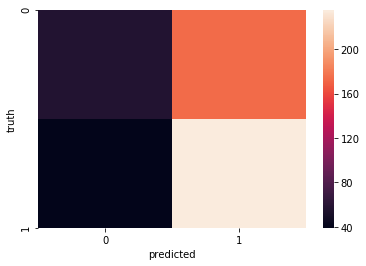

In [49]:
cm = confusion_matrix(y, y_pred_newboundary) 
%matplotlib inline
plt.figure(figsize=(6,4))
sns.heatmap(cm)
plt.xlabel('predicted')
plt.ylabel('truth')

### precision score = nbr of true positives / (nbr of true positives + nbr of false positives)

##### Remark: Based on the confusion matrix, True positive is when y_pred= 'yes' while y='yes'. Also False positives is when y_pred='yes' but y= 'no', and lastly, False negatives is when y_pred = 'no' but should be 'yes' instead

In [50]:
precision_score(y, y_pred)

0.624113475177305

### recall_score = nbr of true positives / (nbr of true positives + nbr of false negatives)

In [51]:
recall_score(y, y_pred) 

0.6423357664233577

### roc_auc_score = "False Positive RATE" in function of "True Positive RATE" :   f(FPR) = TPR, the closest to 1 the better it is

In [52]:
roc_auc_score(y, y_pred)

0.5917306537744493

## LDA : Linear Discriminant Analysis

In [53]:
clf_lda= LinearDiscriminantAnalysis()

In [54]:
clf_lda.fit(X, y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [55]:
y_lda_pred = clf_lda.predict(X)

Text(33.0, 0.5, 'truth')

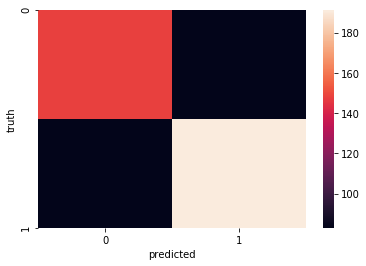

In [56]:
cm1 = confusion_matrix(y, y_lda_pred)
%matplotlib inline
plt.figure(figsize=(6,4))
sns.heatmap(cm1)
plt.xlabel('predicted')
plt.ylabel('truth')

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
#size of our x and y train & test saples ( 5 is the number of variables included in X)
print( X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 17) (101, 17) (404,) (101,)


## Logistic Regression

In [59]:
clf_lr= lr()
clf_lr.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
y_test_pred= clf_lr.predict(X_test)

Text(33.0, 0.5, 'y_test_from_split')

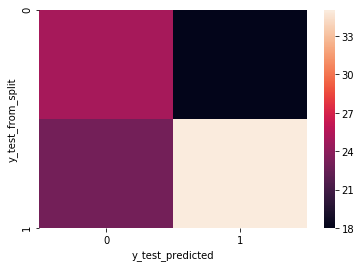

In [61]:
cm1 = confusion_matrix(y_test, y_test_pred)
%matplotlib inline
plt.figure(figsize=(6,4))
sns.heatmap(cm1)
plt.xlabel('y_test_predicted')
plt.ylabel('y_test_from_split')

In [62]:
accuracy_score(y_test, y_test_pred)

0.594059405940594

## Data Standardization: ( scaler )

In [63]:
# we do standardize S train and X test so that the knn model accuracy does not decrease because of the range of the data for some variables
scaler= preprocessing.StandardScaler().fit(X_train) 
X_train_s= scaler.transform(X_train)


In [64]:
scaler= preprocessing.StandardScaler().fit(X_test) 
X_test_s= scaler.transform(X_test)
X_test_s

array([[ 0.04869194, -0.52718557, -0.27294754, ..., -0.51234754,
         1.2349089 ,  0.1       ],
       [ 2.41337245, -0.52236919, -0.28519382, ..., -0.51234754,
        -0.80977633,  0.1       ],
       [-0.75399777,  0.62667148,  0.07301007, ...,  1.95180015,
        -0.80977633,  0.1       ],
       ...,
       [-0.60213756, -0.5121999 , -0.23244059, ..., -0.51234754,
         1.2349089 ,  0.1       ],
       [-0.2007927 , -0.49885553, -0.12505007, ..., -0.51234754,
         1.2349089 ,  0.1       ],
       [-0.18994554, -0.51714532, -0.1516622 , ..., -0.51234754,
        -0.80977633,  0.1       ]])

## K- Nearest Neighbors  APPLICATION 

In [65]:
#case of k=1
knn_1 = knc(n_neighbors= 1)
knn_1.fit(X_train_s, y_train)

y_pred_k1nn = knn_1.predict(X_test_s)
accuracy_score(y_test, y_pred_k1nn)

0.44554455445544555

In [66]:
#case_of k=3
knn_3 = knc(n_neighbors= 3)
knn_3.fit(X_train_s, y_train)
accuracy_score(y_test, knn_3.predict(X_test_s))

0.5445544554455446

## Confusion matrix for k= 1

Text(33.0, 0.5, 'y_test')

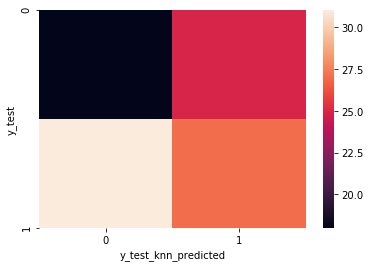

In [67]:
cm2= confusion_matrix(y_test, y_pred_k1nn)
%matplotlib inline
plt.figure(figsize=(6,4))
sns.heatmap(cm2)
plt.xlabel('y_test_knn_predicted')
plt.ylabel('y_test')

## Optimizing parameter K for best accuracy possible using Grid Search

In [68]:
k_values = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] }
#n_neighbors is the parameter responsible of iterating the Gridsearch over the values 1-20; each time it takes a value

In [69]:
grid = GridSearchCV(knc(), k_values) 

In [70]:
# fit the grid with data
grid.fit(X_train_s, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [71]:
grid.best_params_

{'n_neighbors': 7}

In [72]:
grid.best_estimator_ #optimal K based on the GridSearch

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [73]:
optimized_knn= grid.best_estimator_

In [74]:
y_pred_knn_bestk =  optimized_knn.predict(X_test_s)

Text(33.0, 0.5, 'y_test')

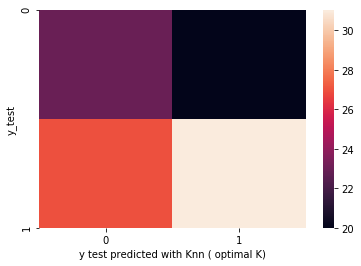

In [75]:
cm3 = confusion_matrix(y_test, y_pred_knn_bestk)
%matplotlib inline
plt.figure(figsize=(6,4))
sns.heatmap(cm3)
plt.xlabel('y test predicted with Knn ( optimal K)')
plt.ylabel('y_test')

In [76]:
accuracy_score(y_test, y_pred_knn_bestk)

0.5346534653465347

### Or instead of GridSearch, we can visualize the results and pick the optimal K from the graph using a traditional counter-based function

In [77]:
k_range = range (1,31)
precision = []
for k in k_range:
    knn = knc(n_neighbors = k)
    knn.fit(X_train_s,y_train)
    y_pred = knn.predict(X_test_s)
    precision.append(accuracy_score(y_test, y_pred))

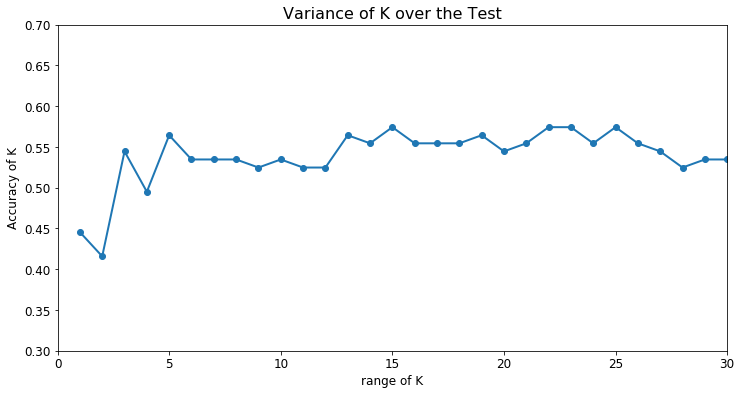

In [78]:
%matplotlib inline

plt.figure(figsize=(12,6)) 

plt.title('Variance of K over the Test', fontsize= 16)
plt.xlabel('range of K', fontsize= 12)
plt.ylabel('Accuracy of K', fontsize=12)
 
plt.xticks(fontsize=12)  #the fontsize of the numbers of the X  scale / the numbers size 
plt.yticks(fontsize=12) 

plt.xlim(0,30) # label limits (range of X data)
plt.ylim(0.3,0.7)

plt.plot(k_range, precision, linewidth=2, marker='o')

plt.show()

### Here , we can easily notice that the result given by GridSearch (k_optimal=7) isn't identical to the result given by the typical counter-based function, as shows the graph above ( k_optimal= 25)

### ==================================================================================

## Reminders: 
### When we have very small P_values, it means that the correspondant independant variables of these p_values are impacting the response variable==> we should keep those variables, and vice versa

### "Estimate" column in the model summary is for the Beta values ; 
	### 1- the larger the values, the higher is the impact of that variable on the response variable or output
    ### 2- the (-) sign means that the higher we increase that variable , the output decreases

### KNN is a non parametric Method; there are no Betas
### among drawbacks of KNN, it doesn't tell us the relationship of that specific variable with response variable

### Linear Discriminant analysis is based on the conditional probability 

In [79]:
# Important tool: the LabelEncoder from sklearn(might need it later)
'''>>> from sklearn import preprocessing
>>> le = preprocessing.LabelEncoder()
>>> le.fit([1, 2, 2, 6])
LabelEncoder()
>>> le.classes_
array([1, 2, 6])
>>> le.transform([1, 1, 2, 6])
array([0, 0, 1, 2]...)
>>> le.inverse_transform([0, 0, 1, 2])
array([1, 1, 2, 6]) ''' 

'>>> from sklearn import preprocessing\n>>> le = preprocessing.LabelEncoder()\n>>> le.fit([1, 2, 2, 6])\nLabelEncoder()\n>>> le.classes_\narray([1, 2, 6])\n>>> le.transform([1, 1, 2, 6])\narray([0, 0, 1, 2]...)\n>>> le.inverse_transform([0, 0, 1, 2])\narray([1, 1, 2, 6]) '

In [80]:
# example of training a final classification model
'''from sklearn.linear_model import LogisticRegression
# fit final model
model = LogisticRegression()
model.fit(X, y)'''

'from sklearn.linear_model import LogisticRegression\n# fit final model\nmodel = LogisticRegression()\nmodel.fit(X, y)'

## ============================================================================

## Linear Regression for one variable case & Multiple variable case: 

### 1- One Variable:

#### for the dependant variables , we gonna choose another variable instead of "Start_Tech_Oscar" since this last is of type boolean and the graph obtained later on won't present a good visualization for a boolean type variable, instead, we'll adopt "Trailer views" as dependant variable for both the model and the plot

In [81]:
from sklearn.linear_model import LinearRegression

In [103]:
x= df[['Budget']]  # the dependant variable should be two-dimensional ( Double brackets)
y= df['Trailer_views']

In [104]:
lm = LinearRegression()
lm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
print(lm.intercept_ , lm.coef_)

67912.83542001667 [10.93935454]


### plotting the regression: 

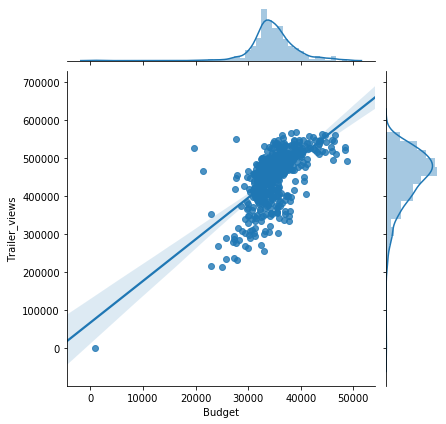

In [107]:
x= df['Budget'] # now here in plotting, X and Y should be of the same dimension
sns.jointplot(x, y , data= df, kind='reg')

### 2 - Multiple variables: 

#### Method 1: ( works for only 1 variable case too)

In [111]:
import statsmodels.api as stm

In [117]:
X_multi= df.drop("Start_Tech_Oscar", axis= 1) # Important remark: axis=0 is for rows / axis=1 is for columns
X_multi_const= stm.add_constant(X_multi)

C:\Users\amine\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [118]:
y_multi= df['Start_Tech_Oscar']

In [119]:
lm_multi = stm.OLS(y_multi, X_multi_const).fit()

In [120]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Start_Tech_Oscar   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     5.811
Date:                Fri, 22 May 2020   Prob (F-statistic):           3.53e-12
Time:                        04:45:51   Log-Likelihood:                -318.05
No. Observations:                 505   AIC:                             672.1
Df Residuals:                     487   BIC:                             748.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1146.0085    500.289      2.291      0.022     163.017    2129.000
Collection           1.731e-05      2e-06      8.640      0.000    1.34e-05    2.13e-05
Marketing expense       0.0001      0.000      0.765      0.445      -0.000       0.000
Production expense      0.0004      0.003      0.141      0.888      -0.005       0.005
Multiplex coverage     -1.0626      0.528     -2.014      0.045      -2.099      -0.026
Budget               -2.81e-05    7.8e-06     -3.604      0.000   -4.34e-05   -1.28e-05
Movie_length            0.0011      0.001      0.865      0.388      -0.001       0.004
Trailer_views       -2.811e-06   5.32e-07     -5.285      0.000   -3.86e-06   -1.77e-06
Time_taken             -0.0015      0.001     -2.187      0.029      -0.003      -0.000
Twitter_hastags         0.0006      0.001      0.964      0.335      -0.001       0.002
Avg_age_actors          0.0011      0.002      0.660      0.509      -0.002       0.004
Num_multiplex          -0.0006      0.000     -1.149      0.251      -0.002       0.000
Average_rating         -0.1789      0.045     -3.967      0.000      -0.268      -0.090
3D_available_YES        0.0407      0.043      0.951      0.342      -0.043       0.125
Genre_Comedy           -0.0331      0.067     -0.491      0.623      -0.165       0.099
Genre_Drama            -0.0054      0.073     -0.074      0.941      -0.150       0.139
Genre_Thriller         -0.0902      0.066     -1.365      0.173      -0.220       0.040
MPAA_film_rating_PG -1141.9142    499.676     -2.285      0.023   -2123.702    -160.126
==============================================================================
Omnibus:                     4154.833   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.384
Skew:                          -0.037   Prob(JB):                     3.12e-11
Kurtosis:                       1.485   Cond. No.                     1.57e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### =====================================================   
    #### Dep. Variable:    Start_Tech_Oscar     R-squared:        0.169 
    #### Model:                 OLS             Adj. R-squared:   0.140

#### ==> R squared and R adjusted are too far from 1; weak correlation 

#### =====================================================
    #### Method    Least Squares        F-statistic:     5.811

#### F-statistic is important  ==> we can say with confidence that our independant variables has no impact on our dependant variables

#### ======================================================
    #### No. Observations:     505  : our "n"

    #### Df Model:              17  : our 'nbr of DEPENDANT variables' or 'k'

    #### Df Residuals:         487  : Degree of Freedom: df= n-k-1 = 505-17-1 = 487
    


#### =========================================================

    ##### The lower the P-value, the more important and intervening is the correspendant dependant variable in determining the independant variable 

    #### according to the summary below, the most important dependant variables (or factors) are: Collection, Budget, and Average rating

### Method 2: ( Using Sklearn): 

In [121]:
lm2 = LinearRegression()
lm2.fit(X_multi, y_multi) #with Sklearn, we use dependant variables without adding a constant to them (<> X_multi_const)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [122]:
print(lm2.intercept_ , lm2.coef_)

1146.0084963566023 [ 1.73145170e-05  1.07810583e-04  3.67172128e-04 -1.06259814e+00
 -2.80978912e-05  1.07815595e-03 -2.81125526e-06 -1.49639086e-03
  5.99030264e-04  1.10889275e-03 -5.56817457e-04 -1.78903713e-01
  4.06881215e-02 -3.30700655e-02 -5.41101197e-03 -9.02279899e-02
 -1.14191415e+03]
